In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [4]:
from manofunkcijos import *

In [5]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

In [59]:
# Turite nusiskaityti iš SQL DB lentelės autopliuslt į Pandas DataFrame gamintoją, 
# kainą, pagaminimo datą, ridą, pavarų tipą, variklio informaciją. 
# SQL užklausoje turite atmesti tuos įrašus, kur rida nenurodyta, taip pat palikite 
# tik nesikartojančius įrašus (atranka pagal ID stuleplį - jei ID sutampa - reiškia, jog skelbimas dubliuojasi)
# pridėkite dar vieną stulpelį, kur būtų rida, suapvalinta 5000 km intervalais

sql="""select Gamintojas, pagaminimo_data as Data, cast(replace(price,' ','') as float) as Kaina, cast(replace(replace(rida,' ',''),'km','')as float) as Rida, pavaros as Pavaros, variklis as Variklis  from autopliuslt
where Rida <> 'Nenurodyta'
group by id;"""

# Destytojo
# #sql užklausa per pandas sql_query
# sql="""with T1
# as (select *, row_number() over (partition by id) as rc from autopliuslt)
# select gamintojas, rida, price as kaina,
# pagaminimo_data as data,
# pavaros, variklis
# from T1
# where rc = 1 and rida != 'Nenurodyta' order by gamintojas"""
# df = pd.read_sql_query(sql, con=DB)
# df.head(2)

df_ap = pd.read_sql_query(sql, con=DB)
def amz(s):
    return 2024-int(s[:4])
def rid(r):
    # return round(r/5000,0)*5000
    return np.ceil(r/5000)*5000
df_ap['R5000'] = df_ap['Rida'].apply(rid)
df_ap['Amžius'] = df_ap['Data'].apply(amz)
df_ap.head()

# Destytojo
# df['R'] = df['rida'].apply(lambda s: float(s.replace(' ','').replace('km','')))
# df['K'] = df['kaina'].apply(lambda s: float(s.replace(' ','').replace('km','')))
# df['amžius'] = df['data'].apply(lambda s: 2024-int(s[:4]))
# df.head()

,Gamintojas,Data,Kaina,Rida,Pavaros,Variklis,R5000,Amžius
0,Mitsubishi,1996,1450.0,173810.0,Mechaninė,2500 cm³,175000.0,28
1,Isuzu,2003,850.0,186684.0,Mechaninė,3000 cm³,190000.0,21
2,Hyundai,2004,1450.0,159326.0,Mechaninė,2400 cm³,160000.0,20
3,Toyota,2008,1450.0,249449.0,Mechaninė,2200 cm³,250000.0,16
4,Mercedes-Benz,2003,1450.0,205997.0,Automatinė,2700 cm³,210000.0,21


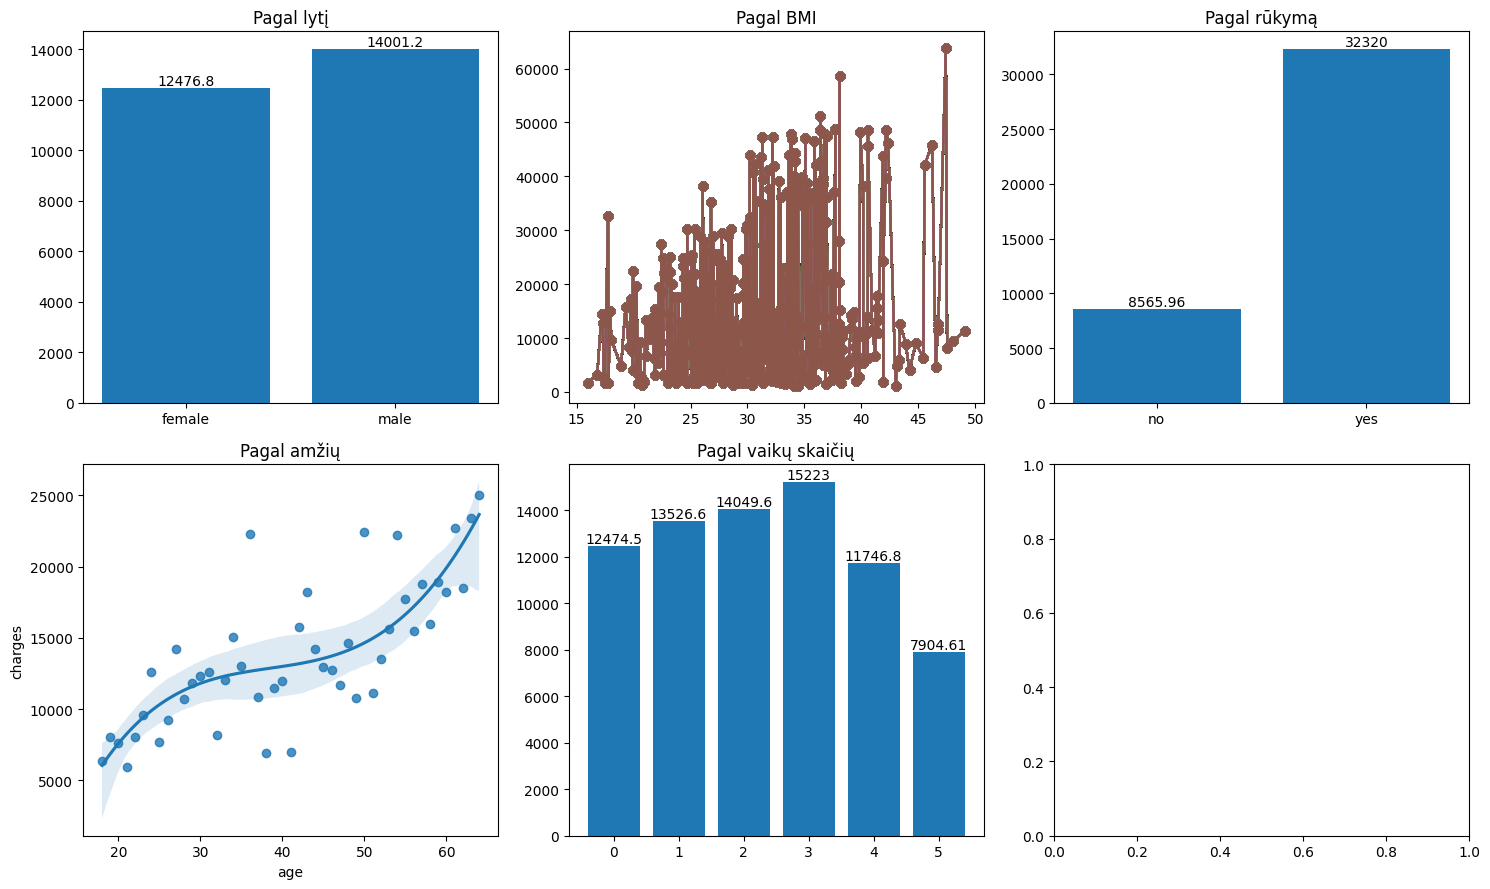

In [71]:
# SQl lentelė - InsuranceUSA7cols. Ar yra priklausoimybė tarp lyties, kūno 
# masės indekso (bmi), rūkymo, amžiaus, vaikų kiekio ir draudimo įmokos dydžio?
sql="""select * from InsuranceUSA7cols;"""
df_in = pd.read_sql_query(sql, con=DB)
dfgr_sex = df_in[['sex', 'charges']].groupby('sex').mean(numeric_only=True).reset_index()
dfgr_bmi = df_in[['bmi', 'age', 'charges']].groupby(['bmi','age']).mean(numeric_only=True).reset_index()
dfgr_smoker = df_in[['smoker', 'charges']].groupby('smoker').mean(numeric_only=True).reset_index()
dfgr_age = df_in[['age', 'charges']].groupby('age').mean(numeric_only=True).reset_index()
dfgr_children = df_in[['children', 'charges']].groupby('children').mean(numeric_only=True).reset_index()
# print(dfgr_bmi.head(10))

fig, axes = plt.subplots(2,3,figsize=(15,9))
a = axes[0,0].bar(dfgr_sex['sex'], dfgr_sex['charges'])
axes[0,0].bar_label(a)
axes[0,0].set_title("Pagal lytį")
for age in dfgr_bmi['age']:
    axes[0,1].plot(dfgr_bmi['bmi'], dfgr_bmi['charges'], label = age, marker ='o')
# b = axes[0,1].scatter(dfgr_bmi['bmi'], dfgr_bmi['charges'])
axes[0,1].set_title("Pagal BMI")
c = axes[0,2].bar(dfgr_smoker['smoker'], dfgr_smoker['charges'])
axes[0,2].bar_label(c)
axes[0,2].set_title("Pagal rūkymą")

sns.regplot(data=dfgr_age, x='age', y='charges', order=4, ax=axes[1,0])
axes[1,0].set_title("Pagal amžių")
e = axes[1,1].bar(dfgr_children['children'], dfgr_children['charges'])
axes[1,1].bar_label(e)
axes[1,1].set_title("Pagal vaikų skaičių")
fig.tight_layout()
plt.show()

In [57]:
df_in.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


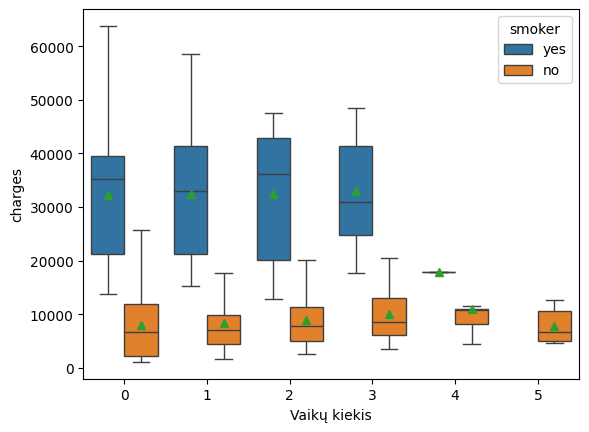

In [63]:
# seaborn galimybės

ax = sns.boxplot(data=df_in, x = 'children', y = 'charges', showmeans=True, showfliers=False, hue='smoker')
ax.set_xlabel('Vaikų kiekis')
plt.show()

<Axes: xlabel='age', ylabel='charges'>

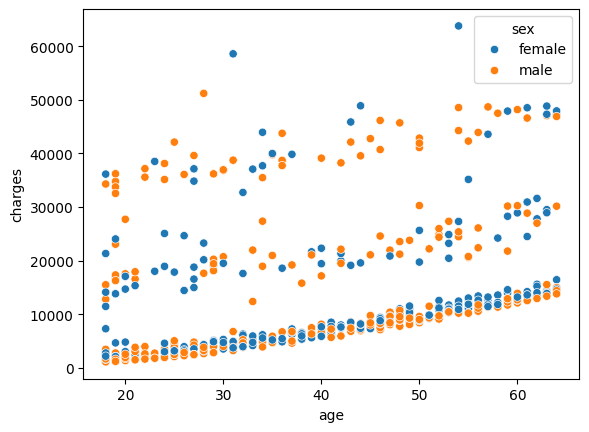

In [64]:
sns.scatterplot(data=df_in, x = 'age', y = 'charges', hue='sex')

<Axes: xlabel='sex'>

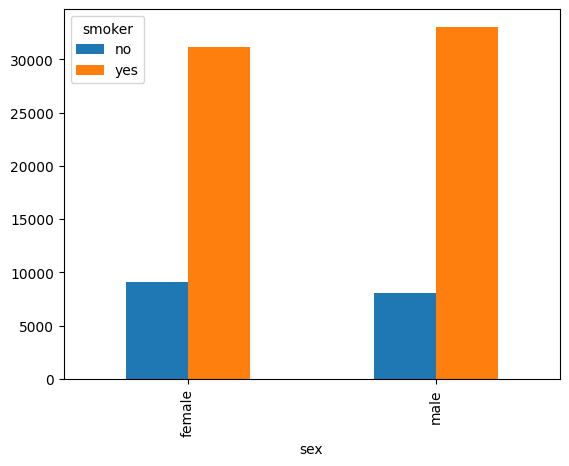

In [68]:
# pandas groupby, unstack() ir braižymas

# df_in.groupby(['sex','smoker'])['charges'].mean().plot(kind='bar')
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
df_in.groupby(['sex','smoker'])['charges'].mean().unstack().plot(kind='bar')

<Axes: xlabel='amzius'>

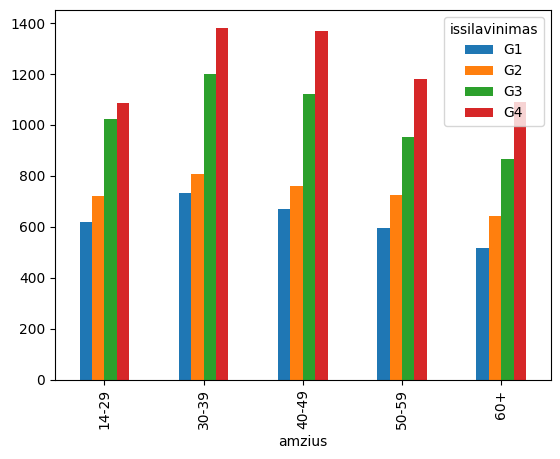

In [72]:
#  dus2018.csv
# parodykite vidutinio atlyginimo priklausomybę nuo išsilavinimo ir amžiaus grupės(bar, vienas grafikas)
d2018 = pd.read_csv('DATA/DUS2018.csv')
d2018.groupby(['amzius','issilavinimas'])['bdu_spalio'].mean().unstack().plot(kind='bar')